In [39]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt

import networkx as nx

from src.utils.data_utils import load_graph_data
from src.data.graph import extract_players_graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Data loading

In [40]:
graph_data = load_graph_data()
print("\nKeys:\n\t{}".format("    ".join(graph_data.keys())))


Keys:
	paths_finished    articles    links    shortest-path-distance-matrix    categories    paths_unfinished    graph


In [41]:
finished_graph = extract_players_graph(graph_data, True)

Note that 4 edges are present in 'paths_finished.tsv' but not in 'links.tsv':
{('Claude_Monet', 'Édouard_Manet'), ('Finland', 'Åland'), ('Republic_of_Ireland', 'Éire'), ('Bird', 'Wikipedia_Text_of_the_GNU_Free_Documentation_License')}


### Analyzing edges

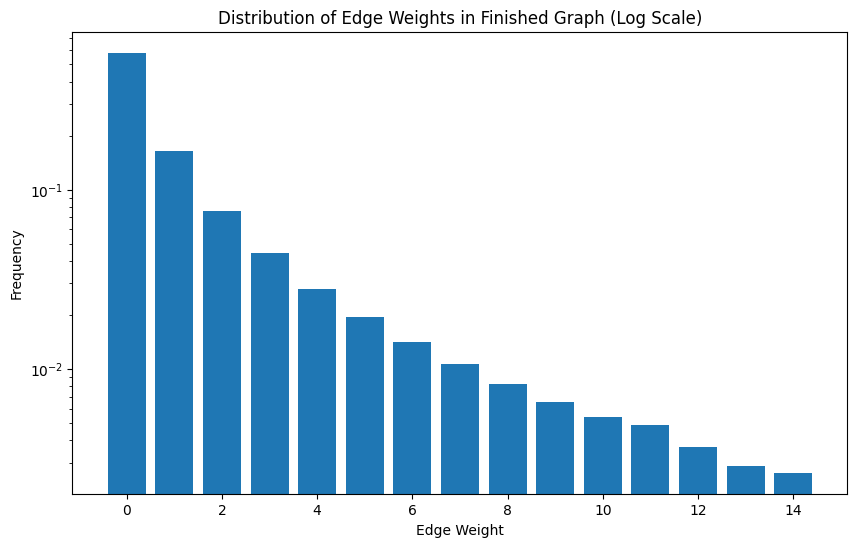

{0: 0.5799823278978231, 1: 0.164848582215439, 2: 0.07611053096634268, 3: 0.04434894369025624, 4: 0.02793798698690658, 5: 0.01959193509518837, 6: 0.014129648967788577, 7: 0.01068358904329665, 8: 0.008209494738533215, 9: 0.006586874447746807, 10: 0.005381958390232147, 11: 0.0048598280986424615, 12: 0.003662944814844566, 13: 0.0028757329906016547, 14: 0.002642782552815487, 15: 0.0022411438669772674, 16: 0.0022491766406940315, 17: 0.0019358984657402202, 18: 0.0016868824805205238, 19: 0.0014619648164511205, 20: 0.0012531126998152461, 21: 0.0012209816049481887, 22: 0.0009960639408787854, 23: 0.0010442605831793717, 24: 0.0009077034299943771, 25: 0.0007791790505261467, 26: 0.0005944252550405655, 27: 0.0005863924813238012, 28: 0.0005703269338902723, 29: 0.0005944252550405655, 30: 0.0004337697807052775, 31: 0.00044180255442204195, 32: 0.0004337697807052775, 33: 0.00038557313840469114, 34: 0.00030524540123704716, 35: 0.00038557313840469114, 36: 0.00023295043778616756, 37: 0.0003614748172543979, 3

In [42]:
# Extract edge weights
weights = [data['weight'] for _, _, data in finished_graph.edges(data=True)]
num_edges = len(weights)
frequencies = {w: weights.count(w) / num_edges for w in set(weights)}

# Cut off the tail for better visualization
cutoff = 0.0023
filtered_frequencies = {k: v for k, v in frequencies.items() if v >= cutoff}

# Plot filtered_frequencies with log scale
plt.figure(figsize=(10, 6))
plt.bar(filtered_frequencies.keys(), filtered_frequencies.values())
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Edge Weights in Finished Graph (Log Scale)')
plt.show()

print(frequencies)

As we can see in the above graph, 57% of the hyperlinks were never clicked by any user, 16% of the hyperlinks were clicked only once and 7% of the hyperlinks were clicked twice. Let's take a closer look at that.

Below are the 20 most clicked hyperlinks by any user

In [43]:
edges: list[int] = [(u, v, data['weight']) for u, v, data in finished_graph.edges.data()]
edges.sort(key= lambda x: x[2], reverse=True)
for i in range(20):
    print(f"Clicked {edges[i][2]} times: {edges[i][0]} -> {edges[i][1]}")

Clicked 536 times: Communication -> Telephone
Clicked 487 times: North_America -> United_States
Clicked 483 times: Animal -> Mammal
Clicked 473 times: United_States -> President_of_the_United_States
Clicked 472 times: Lion -> Zebra
Clicked 464 times: Europe -> United_Kingdom
Clicked 463 times: Brain -> Computer_science
Clicked 462 times: Mammal -> Zebra
Clicked 411 times: Norway -> Viking
Clicked 373 times: England -> Europe
Clicked 364 times: Seed -> Bean
Clicked 353 times: United_Kingdom -> England
Clicked 348 times: United_States -> North_America
Clicked 340 times: Fish -> Whale_shark
Clicked 317 times: Internet -> World_Wide_Web
Clicked 311 times: United_States -> <
Clicked 307 times: Science -> Chemistry
Clicked 303 times: World_War_II -> Adolf_Hitler
Clicked 302 times: Computer -> Microsoft_Windows
Clicked 299 times: English_language -> United_States


### Analyzing nodes

In [44]:
in_degrees = [(degree, node) for node, degree in finished_graph.in_degree]
in_degrees.sort()

Articles with the highest in-degree

In [45]:
in_degrees[-10:-1][::-1]

[(1551, 'United_States'),
 (972, 'United_Kingdom'),
 (959, 'France'),
 (933, 'Europe'),
 (751, 'World_War_II'),
 (751, 'England'),
 (743, 'Germany'),
 (611, 'India'),
 (598, 'English_language')]

Articles with in-degree 0. There is no hyperlink pointing towards these articles and they can never be reached.

In [46]:
for degree, node in in_degrees:
    if degree > 0:
        break
    print(node)

2005_Hertfordshire_Oil_Storage_Terminal_fire
2005_Lake_Tanganyika_earthquake
A._E._J._Collins
AC_DC
ATLAS_experiment
A_Wrinkle_in_Time
Abacá
Abbadid
Abbas_I_of_Persia
Abraham_Goldfaden
Achilles_tendon
Actuary
Adi_Shankara
Adriaen_van_der_Donck
African_Black_Oystercatcher
African_Brush-tailed_Porcupine
African_Grey_Hornbill
African_Jacana
Albertosaurus
Albrecht_Rodenbach
Aleksey_Arakcheyev
Algoma_Central_Railway
All_your_base_are_belong_to_us
Amda_Seyon_I
Andrew_Gonzalez
Annibale_Bugnini
Antlion
Anton_Alexander_von_Werner
Apaochi
Aradia,_or_the_Gospel_of_the_Witches
Architecture_of_Windows_NT
Architecture_of_the_California_missions
Arp2_3_complex
Arthur_Upfield
Astrophysics_Data_System
Atlantic_herring
Australian_Ringneck
Australian_constitutional_law
Autobianchi_Primula
Automatic_number_plate_recognition
Aye-aye
Baby_Gender_Mentor
Baden-Powell_House
Badugi
Bahamas
Bank_of_China_(Hong_Kong)
Basset_Hound
Battles_of_the_Mexican-American_War
Beep_(SWBLW)
Belton_House
Ben-Hur_(1959_film)
Be